In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as  sm
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')



# Reading And Uderstanding the Data

In [318]:
df=pd.read_csv(r'C:\Users\ROBO\Desktop\python_files\machine_learning\day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [319]:
df.shape

(730, 16)

In [320]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [322]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# DATA CLEANING

create a copy of the variables

In [323]:
# The columns we would drop are : 'instant','dteday','casual','registered'
# For this we will first make the copy of our Bikes Data and then delete the Data:

Bikes = df.copy()

# Removing unwanted columns

1: Instant-->this is only a index value.
2: dteday-->this is date which we have separate other column lilke year and month.
3: casual-->this column contains the number of bikes that was booked by different categories.
4: registered-->this columns also contains the number of bikes that was booked by other categories.
   so,we dont need these columns.


In [324]:
Bikes.drop(['instant','dteday','casual','registered'],axis =1 ,inplace = True)

In [325]:
Bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [326]:
Bikes.shape

(730, 12)

In [327]:
Bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# VISUALISATION

# Visualisation of numerical variable

<Figure size 1080x1224 with 0 Axes>

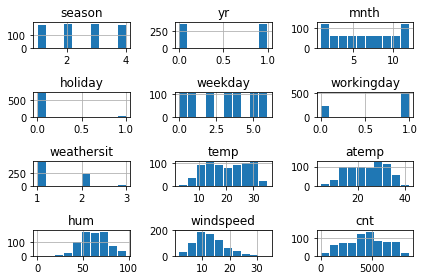

In [328]:
# Plotting The histogram for our Data:

plt.figure(figsize=(15, 17))
Bikes.hist(rwidth = 0.9)
plt.tight_layout()
plt.show()

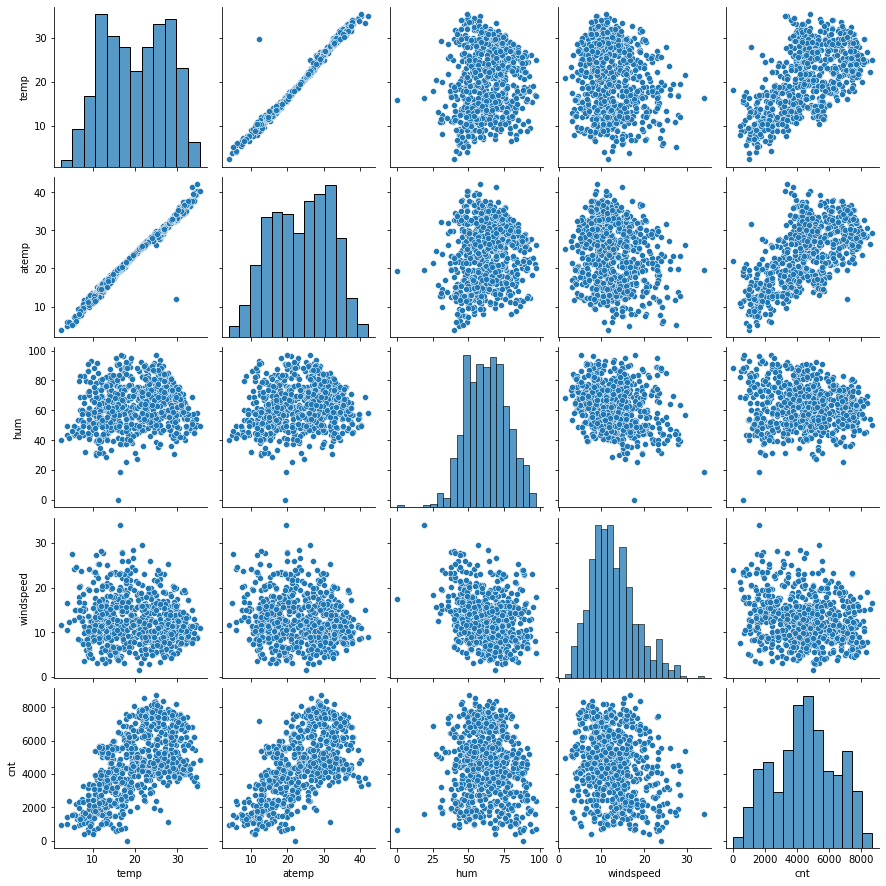

In [329]:
# Create a new dataframe of only numeric variables:

df_num=Bikes[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_num)
plt.show()

INSIGHT

This pairplot tells us there is LINEAR RELATION between 'tem','atem',and cnt.

# Visualising Categorical Variable

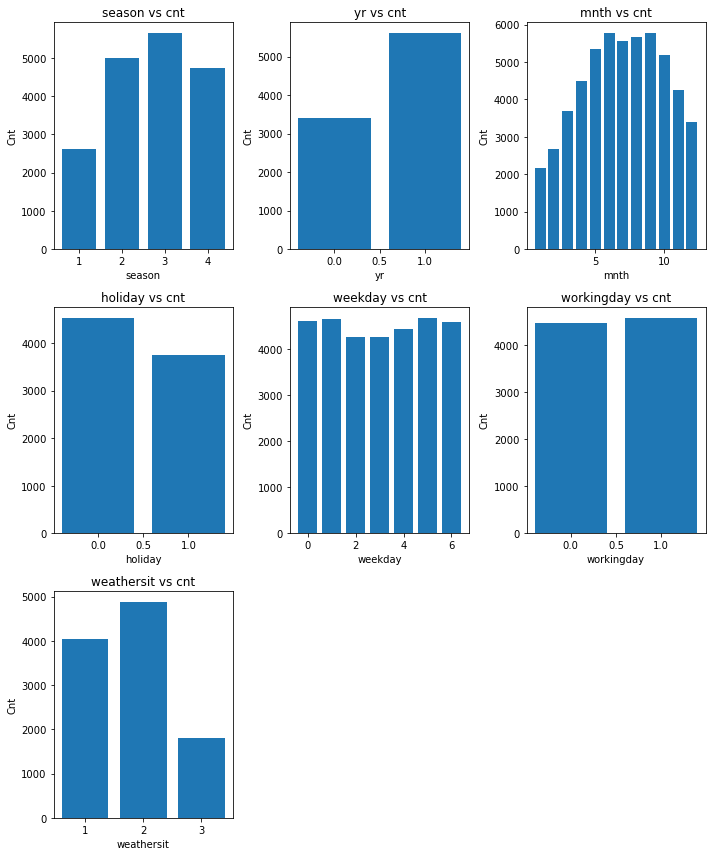

In [435]:
# Plotting the Categorical Values against the Target Variable:
## Getting the avg cnt per the Cat Variables and Plotting it against the Target Varible:

categorical = ['season', 'yr', 'mnth','holiday','weekday','workingday','weathersit']

plt.figure(figsize = (10,12))
i = 1
for col in categorical:
    cat_Unique = Bikes_upd[col].unique()
    cat_avg = Bikes_upd.groupby(col)['cnt'].mean()
    plt.subplot(3,3,i)
    title = col  + ' vs cnt'
    plt.bar(cat_Unique,cat_avg)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Cnt')
    #plt.xticks(rotation = 90)
    i += 1

plt.tight_layout()    
plt.show()

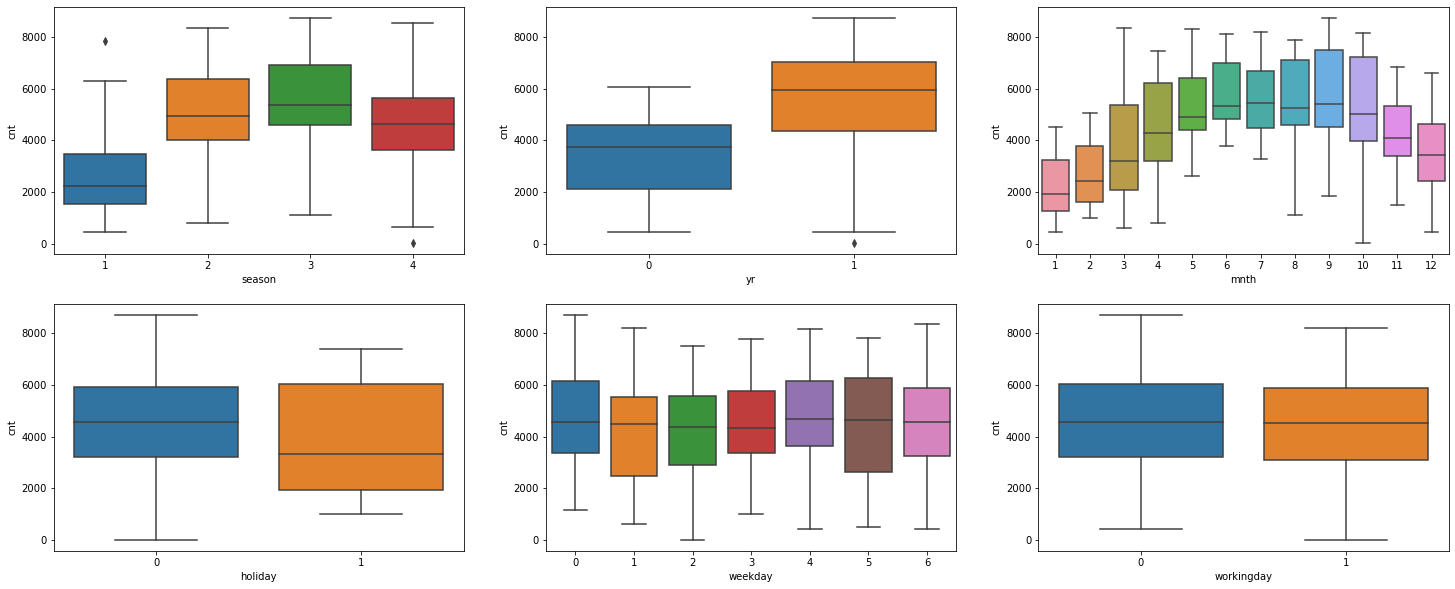

In [330]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = Bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bikes)
plt.show()

INSIGHT

There are 6 categorial variable.

we used box plot to study their effect on dependent variable('cnt).

SEASON : approx 32% were bike booked in season spring and followed by winter and autumn.
    In these three season bike was booked more(above 5000).
    so,we can say that seson can be good predictor for dependent variable('cnt').
    

MNTH: Almost 10% of the bike booking were happening in the months may,june,july,aug & oct with a median of over 4000 booking per month. 
    This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

HOLYDAY: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. 
This indicates, holiday CANNOT be a good predictor for the dependent varible.

WEEKDAY: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. 
This variable can have some or no influence towards the predictor.
I will let the model decide if this needs to be added or not.

WORKINGDAY: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). 
    This indicates, workingday can be a good predictor for the dependent variable

# CORRELATION MATRIX

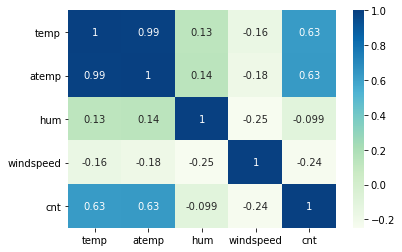

In [331]:
# Now,we check the correlation coefficients to see which variables are highly correlated. 

correlation = df_num.corr()

sns.heatmap(data=correlation, annot = True, cmap="GnBu")
plt.show()

INSIGHT

Here,through this heatmap we can see which  variable are multicollinear in nature, and 
which variable have high collinearity with the target variable.

In [332]:
# Dropping the above features before our Model Building:
# we'll drop the below features as some our insigficant and others are poorly corelated or multicolinerated.

Bikes_final = Bikes.drop(['workingday','weekday','atemp','hum'], axis = 1)
Bikes_final.head()

,season,yr,mnth,holiday,weathersit,temp,windspeed,cnt
0,1,0,1,0,2,14.110847,10.749882,985
1,1,0,1,0,2,14.902598,16.652113,801
2,1,0,1,0,1,8.050924,16.636703,1349
3,1,0,1,0,1,8.200000,10.739832,1562
4,1,0,1,0,1,9.305237,12.522300,1600


In [333]:
Bikes_final.shape

(730, 8)

# DATA PREPARATION

# Dummy Variables

In [334]:
## First, we'll see the dtypes of Final Bikes Data:

Bikes_final.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weathersit      int64
temp          float64
windspeed     float64
cnt             int64
dtype: object

Now for creating Dummy Variables we want our Catergorical variables to be converted to Category.

In [335]:
# Changing our Categorical Variables datatype from int to Category

categorical_new = ['season', 'yr', 'mnth','holiday','weathersit']

for i in categorical_new:
    Bikes_final[i] = Bikes_final[i].astype('category')

# Checking our new Data Type:

Bikes_final.dtypes


season        category
yr            category
mnth          category
holiday       category
weathersit    category
temp           float64
windspeed      float64
cnt              int64
dtype: object

In [336]:
## Creating the dummies finally after changing the data type:

Bikes_final = pd.get_dummies(Bikes_final,drop_first= True)

In [337]:
# Checking the shape of the Data:

Bikes_final.shape

(730, 21)

In [338]:
Bikes_final.head()

,temp,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,weathersit_2,weathersit_3
0,14.110847,10.749882,985,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,14.902598,16.652113,801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,16.636703,1349,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.200000,10.739832,1562,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.305237,12.522300,1600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting into Test and Train Set:

In [339]:
# Splitting the Data

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
Bikes_train, Bikes_test = train_test_split(Bikes_final, train_size = 0.7, test_size = 0.3, random_state = 100)

# RESCALLING THE FEATURE

In [340]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Bikes_Cont_new = ['temp','windspeed','cnt']

Bikes_train[Bikes_Cont_new] = scaler.fit_transform(Bikes_train[Bikes_Cont_new])

In [341]:
Bikes_train.head()

,temp,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,weathersit_2,weathersit_3
653,0.509887,0.300794,0.864243,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
576,0.815169,0.264686,0.827658,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
426,0.442393,0.255342,0.465255,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
728,0.245101,0.663106,0.204096,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,0.395666,0.188475,0.482973,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [342]:
Bikes_train.columns

Index(['temp', 'windspeed', 'cnt', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'holiday_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [343]:
Bikes_train.describe()

,temp,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.320768,0.513620,0.245098,0.262745,0.24902,0.507843,0.066667,0.098039,0.078431,...,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314,0.025490,0.343137,0.029412
std,0.225844,0.169797,0.224593,0.430568,0.440557,0.43287,0.500429,0.249689,0.297660,0.269113,...,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131,0.157763,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.414447,0.684710,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Building a Linear Model

Dividing into X and Y sets for data modelling

In [344]:
y_train = Bikes_train.pop('cnt')
X_train = Bikes_train

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [345]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [346]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [347]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('yr_1', True, 1),
 ('mnth_2', False, 3),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 4),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 2),
 ('mnth_11', False, 5),
 ('mnth_12', False, 6),
 ('holiday_1', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [348]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9', 'holiday_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [349]:
X_train.columns[~rfe.support_]

Index(['mnth_2', 'mnth_7', 'mnth_10', 'mnth_11', 'mnth_12'], dtype='object')

In [350]:
# Creating X_test dataframe with RFE selected variables
X_train = X_train[col]
X_train

,temp,windspeed,season_2,season_3,season_4,yr_1,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,holiday_1,weathersit_2,weathersit_3
653,0.509887,0.300794,0,0,1,1,0,0,0,0,0,0,0,0,0
576,0.815169,0.264686,0,1,0,1,0,0,0,0,0,0,0,0,0
426,0.442393,0.255342,0,0,0,1,1,0,0,0,0,0,0,1,0
728,0.245101,0.663106,0,0,0,1,0,0,0,0,0,0,0,0,0
482,0.395666,0.188475,1,0,0,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.824514,0.355596,1,0,0,1,0,0,0,1,0,0,0,1,0
578,0.863973,0.187140,0,1,0,1,0,0,0,0,1,0,0,0,0
53,0.202618,0.111379,0,0,0,0,0,0,0,0,0,0,0,0,0
350,0.248216,0.431816,0,0,1,0,0,0,0,0,0,0,0,1,0


# Building Linear Model Using 'Statsmodel'

In [351]:
# Building our Model using Statsmodel: 

import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     170.9
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.88e-184
Time:                        16:46:39   Log-Likelihood:                 503.37
No. Observations:                 510   AIC:                            -974.7
Df Residuals:                     494   BIC:                            -907.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1315      0.017      7.628      0.000       0.098       0.165
temp             0.4529      0.036     12.633      0.000       0.382       0.523
windspeed       -0.1514      0.025     -5.973      0.000      -0.201      -0.102
season_2         0.0842      0.022      3.770      0.000       0.040       0.128
season_3         0.0516      0.023      2.216      0.027       0.006       0.097
season_4         0.1665      0.014     11.929      0.000       0.139       0.194
yr_1             0.2337      0.008     28.382      0.000       0.218       0.250
mnth_3           0.0525      0.017      3.033      0.003       0.019       0.087
mnth_4           0.0504      0.026      1.907      0.057      -0.002       0.102
mnth_5           0.0608      0.027      2.259      0.024       0.008       0.114
mnth_6           0.0435      0.023      1.890      0.059      -0.002       0.089
mnth_8           0.0537      0.019      2.898      0.004       0.017       0.090
mnth_9           0.1136      0.018      6.382      0.000       0.079       0.149
holiday_1       -0.0899      0.026     -3.450      0.001      -0.141      -0.039
weathersit_2    -0.0818      0.009     -9.292      0.000      -0.099      -0.064
weathersit_3    -0.2844      0.025    -11.529      0.000      -0.333      -0.236
==============================================================================
Omnibus:                       60.900   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.192
Skew:                          -0.641   Prob(JB):                     3.61e-31
Kurtosis:                       5.226   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 1

VIF CHECK

In [353]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,17.84
3,season_3,8.40
2,season_2,7.41
8,mnth_5,3.71
1,windspeed,3.60
7,mnth_4,3.33
4,season_4,2.85
9,mnth_6,2.38
5,yr_1,2.05
10,mnth_8,2.01


# Dropping the variable and building the model again:

In [354]:
X_new = X_train.drop('mnth_6', 1)

In [355]:

# Add a constant
X_train_lm = sm.add_constant(X_new)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.9
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          8.03e-185
Time:                        16:56:06   Log-Likelihood:                 501.54
No. Observations:                 510   AIC:                            -973.1
Df Residuals:                     495   BIC:                            -909.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1290      0.017      7.485      0.000       0.095       0.163
temp             0.4748      0.034     13.964      0.000       0.408       0.542
windspeed       -0.1511      0.025     -5.947      0.000      -0.201      -0.101
season_2         0.1045      0.020      5.324      0.000       0.066       0.143
season_3         0.0468      0.023      2.018      0.044       0.001       0.092
season_4         0.1603      0.014     11.783      0.000       0.134       0.187
yr_1             0.2333      0.008     28.268      0.000       0.217       0.250
mnth_3           0.0391      0.016      2.470      0.014       0.008       0.070
mnth_4           0.0222      0.022      1.015      0.310      -0.021       0.065
mnth_5           0.0292      0.021      1.381      0.168      -0.012       0.071
mnth_8           0.0438      0.018      2.457      0.014       0.009       0.079
mnth_9           0.1066      0.017      6.107      0.000       0.072       0.141
holiday_1       -0.0920      0.026     -3.529      0.000      -0.143      -0.041
weathersit_2    -0.0826      0.009     -9.379      0.000      -0.100      -0.065
weathersit_3    -0.2865      0.025    -11.597      0.000      -0.335      -0.238
==============================================================================
Omnibus:                       61.542   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.403
Skew:                          -0.658   Prob(JB):                     1.46e-30
Kurtosis:                       5.176   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MODEL 2

VIF CHECK

In [357]:
 # Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,15.75
3,season_3,8.32
2,season_2,5.65
1,windspeed,3.60
4,season_4,2.67
8,mnth_5,2.28
7,mnth_4,2.25
5,yr_1,2.04
9,mnth_8,1.85
12,weathersit_2,1.50


# Dropping the variable and updating the model

In [358]:
X_new = X_new.drop(["mnth_4"], axis = 1)

In [359]:
# Add a constant
X_train_lm3 = sm.add_constant(X_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [360]:
lr3.params

const           0.130494
temp            0.469280
windspeed      -0.147905
season_2        0.116546
season_3        0.048630
season_4        0.160118
yr_1            0.233819
mnth_3          0.034099
mnth_5          0.018156
mnth_8          0.043818
mnth_9          0.106503
holiday_1      -0.091803
weathersit_2   -0.082752
weathersit_3   -0.286496
dtype: float64

In [361]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.8
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          9.38e-186
Time:                        17:00:21   Log-Likelihood:                 501.01
No. Observations:                 510   AIC:                            -974.0
Df Residuals:                     496   BIC:                            -914.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1305      0.017      7.602   

MODEL 4

VIF CHECK

In [362]:
vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,15.46
3,season_3,8.29
2,season_2,3.63
1,windspeed,3.44
4,season_4,2.67
5,yr_1,2.03
8,mnth_8,1.85
7,mnth_5,1.68
11,weathersit_2,1.50
9,mnth_9,1.48


Removing the variabl'mnth_5' based on its Very High 'VIF' value.

# Removing the variable and updating the variable

In [364]:
X_new = X_new.drop(["mnth_5"], axis = 1)

In [366]:
# Add a constant
X_train_lm4 = sm.add_constant(X_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [367]:
# Check the parameters obtained

lr4.params

const           0.130084
temp            0.476164
windspeed      -0.150155
season_2        0.120395
season_3        0.044249
season_4        0.158156
yr_1            0.233308
mnth_3          0.031188
mnth_8          0.043711
mnth_9          0.106559
holiday_1      -0.092488
weathersit_2   -0.082079
weathersit_3   -0.286590
dtype: float64

In [368]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.04e-186
Time:                        17:04:36   Log-Likelihood:                 500.49
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -919.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1301      0.017      7.580   

MODEL 5

VIF CHECK

In [369]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,temp,14.62
3,season_3,8.00
2,season_2,3.41
1,windspeed,3.39
4,season_4,2.61
5,yr_1,2.02
7,mnth_8,1.85
10,weathersit_2,1.50
8,mnth_9,1.48
6,mnth_3,1.25


Dropping the feature and building the model again

In [370]:
X_new = X_new.drop('season_3', 1)

In [371]:
# Add a constant
X_train_lm5 = sm.add_constant(X_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [372]:
# Check the parameters obtained

lr5.params

const           0.125020
temp            0.523495
windspeed      -0.152746
season_2        0.100073
season_4        0.142661
yr_1            0.232263
mnth_3          0.025541
mnth_8          0.056346
mnth_9          0.117968
holiday_1      -0.094450
weathersit_2   -0.082466
weathersit_3   -0.284287
dtype: float64

In [373]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.7
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          4.40e-187
Time:                        17:08:09   Log-Likelihood:                 498.55
No. Observations:                 510   AIC:                            -973.1
Df Residuals:                     498   BIC:                            -922.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1250      0.017      7.350   

MODEL 6

VIF CHECK

In [374]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,temp,5.01
1,windspeed,3.29
4,yr_1,2.01
2,season_2,1.81
6,mnth_8,1.59
3,season_4,1.53
9,weathersit_2,1.49
7,mnth_9,1.31
5,mnth_3,1.19
10,weathersit_3,1.08


Dropping the variable and Building the model again:

In [375]:
X_new = X_new.drop('mnth_3', 1)


In [376]:
# Add a constant
X_train_lm6 = sm.add_constant(X_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()


In [377]:
# Check the parameters obtained

lr6.params

const           0.131241
temp            0.517361
windspeed      -0.149737
season_2        0.099972
season_4        0.138343
yr_1            0.232489
mnth_8          0.054165
mnth_9          0.116177
holiday_1      -0.097109
weathersit_2   -0.082534
weathersit_3   -0.282834
dtype: float64

In [378]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.26e-187
Time:                        17:13:45   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1312      0.017      7.871   

MODEL 7

VIF CHECK

In [379]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.01
1,windspeed,3.10
4,yr_1,2.00
2,season_2,1.81
5,mnth_8,1.58
3,season_4,1.49
8,weathersit_2,1.48
6,mnth_9,1.31
9,weathersit_3,1.08
7,holiday_1,1.04


Dropping the variable and building the model again:

In [381]:
X_new = X_new.drop('windspeed', 1)

In [382]:
# Add a constant
X_train_lm7 = sm.add_constant(X_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()


In [383]:
# Check the parameters obtained

lr7.params

const           0.070264
temp            0.539040
season_2        0.095578
season_4        0.146153
yr_1            0.231263
mnth_8          0.058455
mnth_9          0.123609
holiday_1      -0.100177
weathersit_2   -0.080930
weathersit_3   -0.297362
dtype: float64

In [388]:
# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.99e-181
Time:                        17:18:58   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0703      0.014      5.164   

In [385]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIF
vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.92
3,yr_1,1.94
1,season_2,1.78
4,mnth_8,1.56
2,season_4,1.47
7,weathersit_2,1.44
5,mnth_9,1.29
8,weathersit_3,1.06
6,holiday_1,1.03


INSIGHT

This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors 
and the p-values for all the predictors seems to be significant. 
For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

From the lr7 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

F STATISTICS

# F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.



F STATISTICS:257.6

Prob (F-statistic): 1.99e-181

cnt = 0.3086 + (yr × 0.2353) - (holiday × 0.0924) + (temp × 0.3896) − (windspeed × 0.1516) - (season_summer × 0.1454) - (month_jul ×0.0736) + (mnth_sep × 0.0565)  − (weathersit2 × 0.0820) − (weathersit3 × 0.2783)

In [392]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr7.predict(X_train_lm7)

np.sqrt(mean_squared_error(y_train, y_train_pred))

0.09450945466073261

We finally get model 7 as our final model. We'll go ahead with this model for our analysis.

# RESIDUAL ANALYSIS OF TRAIN DATA

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [393]:
y_train_pred = lr7.predict(X_train_lm7)

Text(0.5, 0, 'Errors')

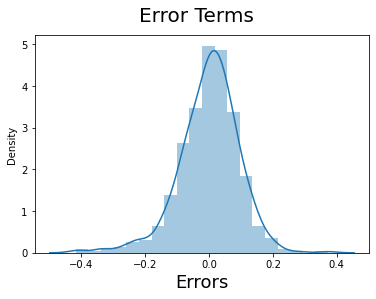

In [394]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


There is a linear relationship between X and Y

Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

There is No Multicollinearity between the predictor variables¶


    INSIGHT

From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

# MAKING PREDICTION USING THE FINAL MODEL

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. SEVENTH model.



Applying scalling on the test set

In [397]:
# Apply scaler() to all numeric variables in test dataset.

Bikes_Cont_new = ['temp','windspeed','cnt']

Bikes_test[Bikes_Cont_new] = scaler.transform(Bikes_test[Bikes_Cont_new])

In [399]:
Bikes_test

,temp,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,weathersit_2,weathersit_3
184,0.831783,0.084219,0.692706,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
535,0.901354,0.153728,0.712034,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
299,0.511964,0.334206,0.303382,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
221,0.881625,0.339570,0.547400,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
152,0.817246,0.537414,0.569029,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0.257562,0.287411,0.336516,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
702,0.519232,0.283397,0.757478,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
127,0.584649,0.069510,0.495973,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
640,0.745598,0.052115,0.868615,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [400]:
Bikes_test.describe()

,temp,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.313350,0.520592,0.264840,0.246575,0.232877,0.479452,0.100457,0.054795,0.091324,...,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758,0.036530,0.319635,0.027397
std,0.233698,0.159947,0.218435,0.442259,0.432005,0.423633,0.500722,0.301297,0.228100,0.288730,...,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125,0.188034,0.467403,0.163612
min,0.046591,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.759096,0.403048,0.672745,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.984424,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


DIVIDING INTO X_TEST AND Y_TEST

In [401]:
y_test = Bikes_test.pop('cnt')
X_test = Bikes_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          219 non-null    float64
 1   windspeed     219 non-null    float64
 2   season_2      219 non-null    uint8  
 3   season_3      219 non-null    uint8  
 4   season_4      219 non-null    uint8  
 5   yr_1          219 non-null    uint8  
 6   mnth_2        219 non-null    uint8  
 7   mnth_3        219 non-null    uint8  
 8   mnth_4        219 non-null    uint8  
 9   mnth_5        219 non-null    uint8  
 10  mnth_6        219 non-null    uint8  
 11  mnth_7        219 non-null    uint8  
 12  mnth_8        219 non-null    uint8  
 13  mnth_9        219 non-null    uint8  
 14  mnth_10       219 non-null    uint8  
 15  mnth_11       219 non-null    uint8  
 16  mnth_12       219 non-null    uint8  
 17  holiday_1     219 non-null    uint8  
 18  weathersit_2  219 non-null   

In [402]:
# Shape of y_test:
y_test.shape

(219,)

In [403]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
400    0.336516
702    0.757478
127    0.495973
640    0.868615
72     0.232858
Name: cnt, Length: 219, dtype: float64

In [404]:
# Pulling in the required columns for X_test
X_test = X_test[X_new.columns]
X_test

,temp,season_2,season_4,yr_1,mnth_8,mnth_9,holiday_1,weathersit_2,weathersit_3
184,0.831783,0,0,0,0,0,1,1,0
535,0.901354,1,0,1,0,0,0,0,0
299,0.511964,0,1,0,0,0,0,1,0
221,0.881625,0,0,0,1,0,0,0,0
152,0.817246,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
400,0.257562,0,0,1,0,0,0,1,0
702,0.519232,0,1,1,0,0,0,0,0
127,0.584649,1,0,0,0,0,0,0,0
640,0.745598,0,1,1,0,0,0,1,0


In [405]:
# Adding constant variable to test dataframe

import statsmodels.api as sm

X_test_m5 = sm.add_constant(X_test)

In [406]:
X_test_m5

,const,temp,season_2,season_4,yr_1,mnth_8,mnth_9,holiday_1,weathersit_2,weathersit_3
184,1.0,0.831783,0,0,0,0,0,1,1,0
535,1.0,0.901354,1,0,1,0,0,0,0,0
299,1.0,0.511964,0,1,0,0,0,0,1,0
221,1.0,0.881625,0,0,0,1,0,0,0,0
152,1.0,0.817246,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
400,1.0,0.257562,0,0,1,0,0,0,1,0
702,1.0,0.519232,0,1,1,0,0,0,0,0
127,1.0,0.584649,1,0,0,0,0,0,0,0
640,1.0,0.745598,0,1,1,0,0,0,1,0


In [408]:
# Making predictions using the fourth model

y_test_pred = lr7.predict(X_test_m5)

In [409]:
# Shape of the Y_test_pred
y_test_pred.shape

(219,)

In [410]:
# Reading the data
y_test_pred

184    0.337521
535    0.882970
299    0.411456
221    0.603950
152    0.606370
         ...   
400    0.359432
702    0.727566
127    0.480991
640    0.768656
72     0.248986
Length: 219, dtype: float64

# MODEL EVALUTION

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_test_pred')

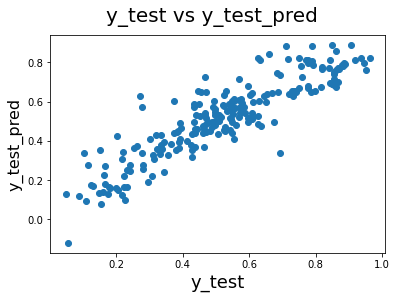

In [412]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                         # Y-label

As we can see the y_test and y_pred points overlap each other and are distributed linearly we can say our model is good.


# R^2 VALUE FOR TEST

In [422]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7964731574157413

# ADJUSTED R^2 VALUE FOR TEST

In [417]:
from sklearn.metrics import mean_squared_error

In [424]:
## Calculating the adj R2 value for Test Dataset

# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r_squared)*(n-1)/(n-p-1),4)
adjusted_r2

0.7877

In [425]:
# Comparing our R2, adj R2 value for Test and Train Data

data = [['R2_Value','82.3%','79.6%'],['Adjusted_R2 Value','81.9%','78.7%']]

Comparison_train_test = pd.DataFrame(data, columns = ['Measurement', 'Train Dataset','Test Dataset'])
Comparison_train_test

,Measurement,Train Dataset,Test Dataset
0,R2_Value,82.3%,79.6%
1,Adjusted_R2 Value,81.9%,78.7%


In [426]:
# This is our best fit MLR model: 7
# Displaying it below:

lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.99e-181
Time:                        17:40:29   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0703      0.014      5.164      0.000       0.044       0.097
temp             0.5390      0.022     24.080      0.000       0.495       0.583
season_2         0.0956      0.011      8.336      0.000       0.073       0.118
season_4         0.1462      0.011     13.389      0.000       0.125       0.168
yr_1             0.2313      0.009     27.142      0.000       0.215       0.248
mnth_8           0.0585      0.017      3.399      0.001       0.025       0.092
mnth_9           0.1236      0.017      7.270      0.000       0.090       0.157
holiday_1       -0.1002      0.027     -3.707      0.000      -0.153      -0.047
weathersit_2    -0.0809      0.009     -8.875      0.000      -0.099      -0.063
weathersit_3    -0.2974      0.026    -11.660      0.000      -0.347      -0.247
==============================================================================
Omnibus:                       62.948   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.343
Skew:                          -0.658   Prob(JB):                     1.67e-32
Kurtosis:                       5.270   Cond. No.                         9.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# FINAL RESULT

 the equation for best fitted line is:

cnt =0.0703+ 0.5390 * temp + summer × 0.0956 + winter × 0.1462 + yr1 × 0.2313 + mnth8 × 0.0585 + mnth9 × 0.1236 - holiday1 ×0.1002 -0.0809 * mist + cloudy - 0.2974 * light rain+thunderstorm

We can see the demand for bikes depends mainly on below variables:

Demand is higher in month of 8, 9

Also, we see a seasonal inclination towards the Bike sharing, prefarrably 'summer' and 'winter'

The company should also take care of temp as it has a huge impact on the model, and it can help in increasing the demand.

In [ ]:
def object_map(x):
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'
    })

day[['mnth']] = day[['mnth']].apply(object_map)

In [ ]:
def ass_symboling(x):
    if x==-2:
        return 'A'
    elif x==-1:
        return 'B'
    elif x==0:
        return 'C'
    elif x==1:
        return 'E'
    else:
        return 'F'
    
df['symboling'] = df['symboling'].apply(ass_symboling)
